# Analysing Mcdonald's SG menu

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

## Summary
* Data courtesy of Mcdonald's SG
* Data scraped from online menu
    * Viewable at 'dataset/mcdDatascraping.ipynb'

## Steps
* Import Dataset
* Explore the Dataset
* Analyse Nutritional Facts
* Conclusion
* Disclaimer

## Import Dataset

In [37]:
# import dataset
menu = pd.read_excel("dataset/mcdmenu.xlsx")
menu.head()

,category,item,energy_kcal,protein_g,totalfat_g,saturatedfat_g,cholesterol_mg,carbohydrates_g,dietaryfibres_g,sodium_mg,egg,fish,milk,peanuts,soyabeans,treenuts,wheat,gluten,msg,sulphite
0,beverages,Dasani® Drinking Water,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False
1,beverages,Coca-Cola® Original Taste Less Sugar (Small),109,0,0,0,0,27,0,7,False,False,False,False,False,False,False,False,False,False
2,beverages,Coca-Cola® Original Taste Less Sugar (Medium),152,0,0,0,0,38,0,10,False,False,False,False,False,False,False,False,False,False
3,beverages,Coca-Cola® Original Taste Less Sugar (Large),221,0,0,0,0,55,0,15,False,False,False,False,False,False,False,False,False,False
4,beverages,Coca-Cola® Zero Sugar (Small),0,0,0,0,0,0,0,29,False,False,False,False,False,False,False,False,False,False


In [38]:
# pull up a summary of the dataset
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   category         122 non-null    object
 1   item             122 non-null    object
 2   energy_kcal      122 non-null    int64 
 3   protein_g        122 non-null    int64 
 4   totalfat_g       122 non-null    int64 
 5   saturatedfat_g   122 non-null    int64 
 6   cholesterol_mg   122 non-null    int64 
 7   carbohydrates_g  122 non-null    int64 
 8   dietaryfibres_g  122 non-null    int64 
 9   sodium_mg        122 non-null    int64 
 10  egg              122 non-null    bool  
 11  fish             122 non-null    bool  
 12  milk             122 non-null    bool  
 13  peanuts          122 non-null    bool  
 14  soyabeans        122 non-null    bool  
 15  treenuts         122 non-null    bool  
 16  wheat            122 non-null    bool  
 17  gluten           122 non-null    bo

In [39]:
menu.shape

(122, 20)

In [40]:
# pull up a statistical summary of the dataset
menu.describe()

,energy_kcal,protein_g,totalfat_g,saturatedfat_g,cholesterol_mg,carbohydrates_g,dietaryfibres_g,sodium_mg
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,392.065574,17.278689,18.606557,5.278689,76.065574,38.393443,2.286885,710.196721
std,359.881816,21.279821,22.509340,5.081586,113.966338,25.668760,2.118316,939.906190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,173.000000,3.000000,4.500000,1.000000,0.250000,20.250000,0.000000,71.250000
50%,361.000000,14.000000,13.000000,5.000000,34.500000,38.000000,2.000000,519.500000
75%,481.750000,23.000000,21.750000,7.000000,87.000000,50.000000,4.000000,927.750000
max,2068.000000,117.000000,122.000000,25.000000,487.000000,125.000000,10.000000,5685.000000


In [41]:
# retrieving all unique categories
print(menu['category'].unique())

['beverages' 'breakfast' 'burgers' 'chicken' 'desserts' 'light' 'family'
 'sharing' 'saladsandwraps' 'sides']


## Explore Dataset

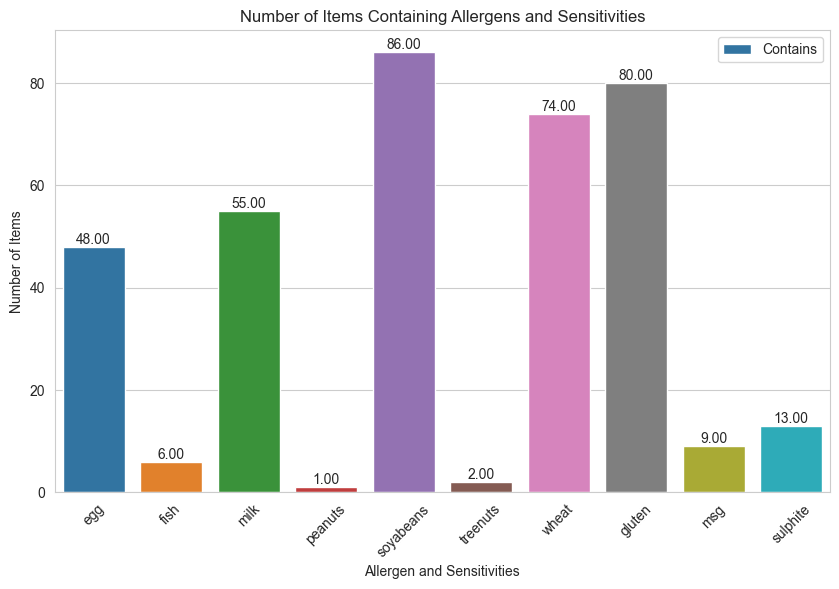

In [144]:
# plot a bar chart showing number of items containing allergens or sensitivities
menu_as = menu[['egg', 'fish', 'milk', 'peanuts', 'soyabeans', 'treenuts', 'wheat', 'gluten', 'msg', 'sulphite']].sum()
df = pd.DataFrame(menu_as)
df = df.rename(columns = {0 : 'count'})

sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))

box = sns.barplot(
    x = df.index,
    y = 'count',
    data = df,
    errorbar = None,
    label = 'Contains'
)
box.bar_label(box.containers[0], fmt = '%.2f', label_type = 'edge')

plt.xlabel('Allergen and Sensitivities')
plt.ylabel('Number of Items')
plt.title('Number of Items Containing Allergens and Sensitivities')
plt.xticks(rotation = 45)
plt.legend();

People allergic to soyabeans or sensitive towards wheat and gluten will want to avoid eating Mcd as majority of items seem to contain them.
<br><br>
Since quite a significant amount of items contain egg and milk, we will explore these two allergens further.

In [152]:
# count items that do not contain egg by category
temp = menu.loc[menu['egg'] == False]
temp.groupby(['category'], as_index = False).agg(
    count = ('item', 'count')
)

,category,count
0,beverages,29
1,breakfast,2
2,burgers,7
3,chicken,5
4,desserts,11
5,family,5
6,light,3
7,saladsandwraps,1
8,sides,11


In [153]:
# count items that do not contain milk by category
temp = menu.loc[menu['milk'] == False]
temp.groupby(['category'], as_index = False).agg(
    count = ('item', 'count')
)

,category,count
0,beverages,18
1,breakfast,2
2,burgers,5
3,chicken,16
4,desserts,1
5,family,4
6,light,3
7,saladsandwraps,3
8,sharing,4
9,sides,11


In [157]:
menu.loc[(menu['milk'] == False) & (menu['category'] == 'desserts')]['item']

75    Apple Pie 
Name: item, dtype: object

People with egg or milk allergies can still enjoy quite a few items from `Burgers`, `Chicken` or `Sides`.
<br><br>
However, people with milk allergy will want to avoid all `Desserts` except `Apple Pie`.

## Analyse Nutritional Facts

In [11]:
# filter menu based on chosen category
# given daily recommended intake and % contribution to check for
# returns the percentage of menu that exceeds the given % contribution

def daily(cat, n, daily, cont):
    menu_cat = menu.loc[menu['category'] == cat]
    contribution = menu_cat[n] / daily

    total = 0
    count = 0
    for i in contribution:
        if i > cont:
            count += 1
        total += 1
    return round(count / total, 2)

### Calories

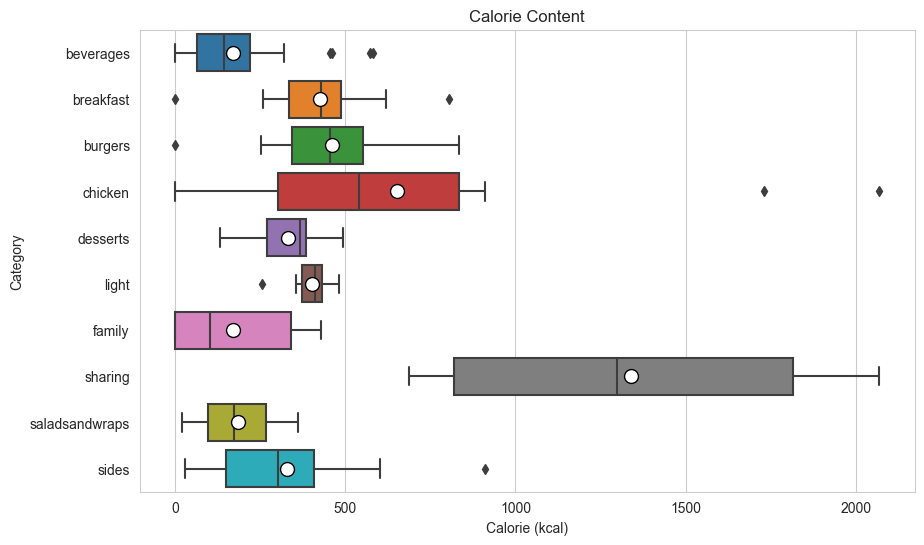

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))

box = sns.boxplot(
    x = 'energy_kcal',
    y = 'category',
    data = menu,
    showmeans = True,
    meanprops = {'marker': 'o',
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'black',
                 'markersize': '10'}
    ).set(
    title = 'Calorie Content',
    xlabel = 'Calorie (kcal)',
    ylabel = 'Category'
)

The recommended daily allowance (RDA) for calories is 2,200kcal for an adult male
* In general, majority of Mcd's menu `Breakfast`, `Burgers`, `Chicken` contain about 500kcal - 700kcal (23% - 32% of RDA)
* When ordered as a meal (eg `Burgers` and `Sides`), the calories goes up to about 800kcal - 1,000kcal (36% - 45% of RDA)
* It is worth noting that `Eat Light Under 500 Calories` are meals containing less than 500kcal (23% of RDA)
    * Which is about 50% lower calories than Mcd's normal meals

### Protein

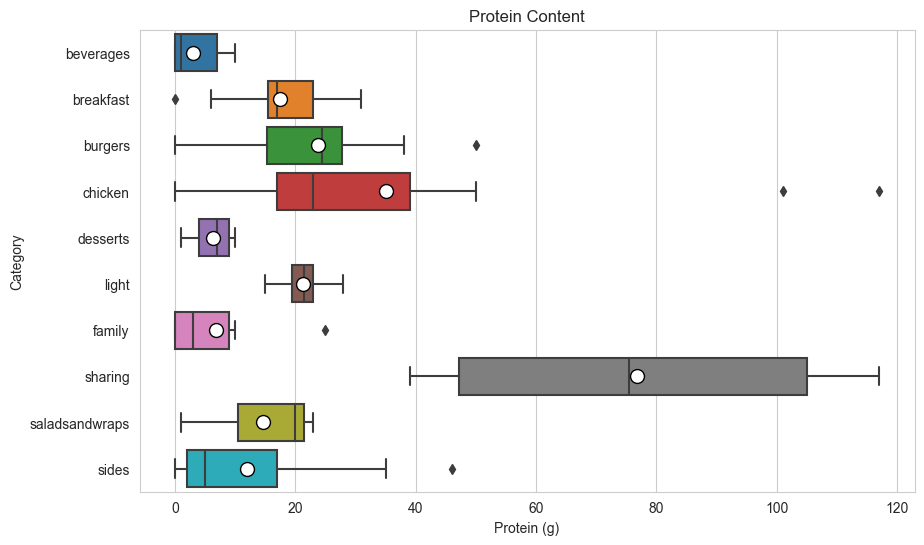

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))

box = sns.boxplot(
    x = 'protein_g',
    y = 'category',
    data = menu,
    showmeans = True,
    meanprops = {'marker': 'o',
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'black',
                 'markersize': '10'}
    ).set(
    title = 'Protein Content',
    xlabel = 'Protein (g)',
    ylabel = 'Category'
)

The daily RDA for protein is 68g for an adult male
* Mcd's menu generally provides decent nutritional value in terms of protein
* Ala carte items from `Breakfast`, `Burgers` and `Chicken` generally provide more than 20g or more protein (29% of RDA)
* When ordering meals (eg `Burgers` and `Sides`), protein content goes up to around 35g (51% of RDA) which is good
* `Salads and Wraps` provide less protein on the whole, about 18g (26% of RDA) ala carte and 34g (50% of RDA) as a meal

### Fat

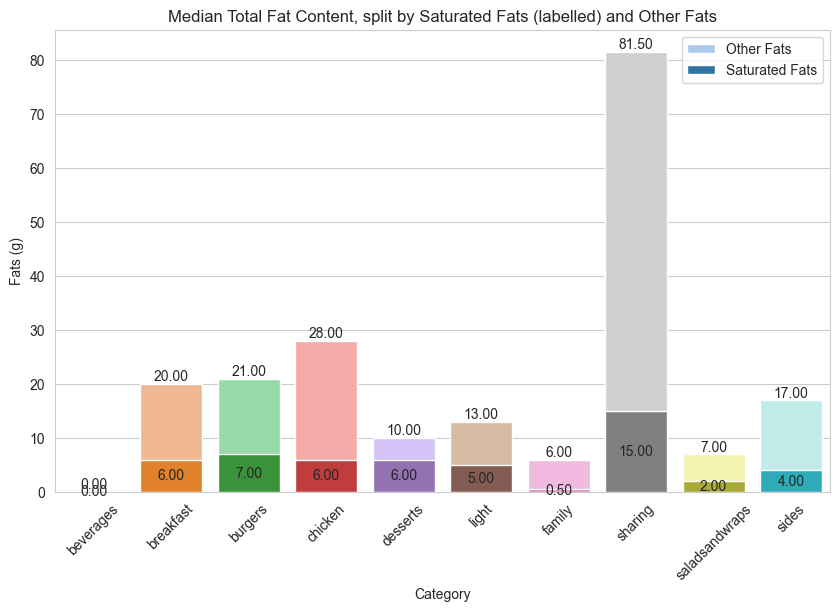

In [106]:
menu_fats = menu

menu_fats = menu_fats.groupby(['category']).agg(
    saturatedfat_g = ('saturatedfat_g', 'median'),
    otherfat_g = ('otherfat_g', 'median'),
    totalfat_g = ('totalfat_g', 'median')
).round(2)

menu_fats = menu_fats.reindex(['beverages', 'breakfast', 'burgers', 'chicken', 'desserts', 'light', 'family', 'sharing', 'saladsandwraps', 'sides'])

sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))

sns.set_palette('pastel')
box_top = sns.barplot(
    x = menu_fats.index,
    y = 'totalfat_g',
    data = menu_fats,
    errorbar = None,
    label = 'Other Fats',
)

sns.set_palette('tab10')
box_bot = sns.barplot(
    x = menu_fats.index,
    y = 'saturatedfat_g',
    data = menu_fats,
    errorbar = None,
    label = 'Saturated Fats'
)
box_top.bar_label(box_top.containers[0], fmt = '%.2f', label_type = 'edge')
box_bot.bar_label(box_bot.containers[1], fmt = '%.2f', label_type = 'center')

plt.xlabel('Category')
plt.ylabel('Fats (g)')
plt.title('Median Total Fat Content, split by Saturated Fats (labelled) and Other Fats')
plt.xticks(rotation = 45)
plt.legend();

Based on a 2,200kcal calorie diet, the RDA for total fat is 75g, out of which saturated fats should be less than 24g
* Mcd menu contains quite a bit of fat
* Ala carte items in `Breakfast`, `Burgers` and `Chicken` all contain significant amount fats, out of which around 7g are from saturated fats (29% of RDA)
* When ordering meals (eg `Burgers` and `Sides`), total fat content can go up to around 38g (51% of RDA), out of which around 11g are from saturated fats (46% of RDA)

### Cholesterol

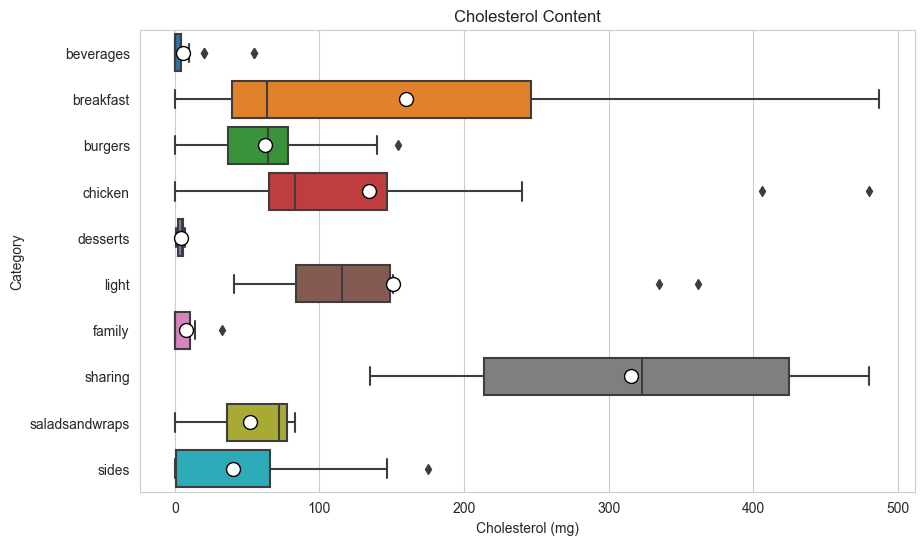

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))

box = sns.boxplot(
    x = 'cholesterol_mg',
    y = 'category',
    data = menu,
    showmeans = True,
    meanprops = {'marker': 'o',
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'black',
                 'markersize': '10'}
    ).set(
    title = 'Cholesterol Content',
    xlabel = 'Cholesterol (mg)',
    ylabel = 'Category'
)

The daily recommended daily allowance (RDA) for cholesterol is 300mg for an adult male
* Mcd's menu is very high in cholesterol
* Ala carte items in `Breakfast`, `Burgers` and `Chicken` contain around 75mg of cholesterol (25% of RDA)
* When ordering meals (eg `Burgers` and `Sides`), total cholesterol can go up to around 125mg (42% of RDA)
* Even for meals in `Eat Light Under 500 Calories`, cholesterol levels are just as high at around 125mg

### Fibre

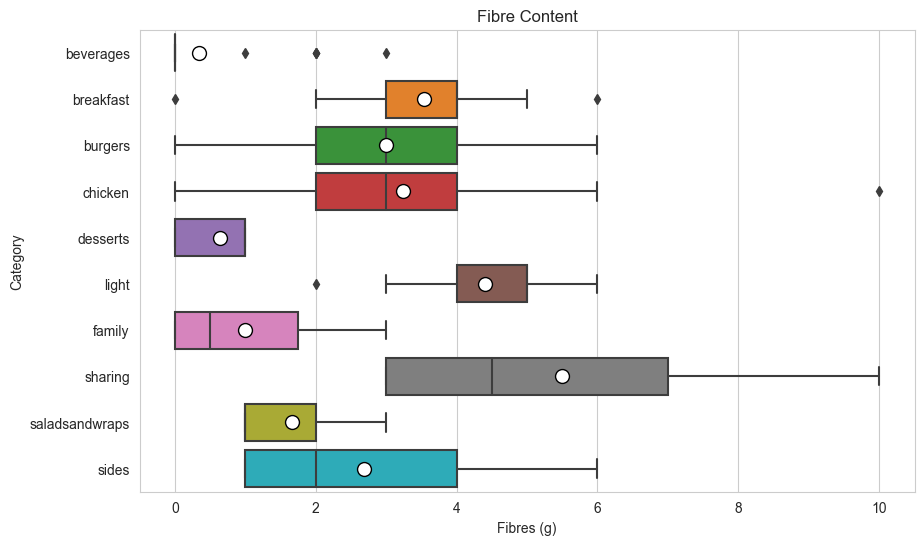

In [16]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))

box = sns.boxplot(
    x = 'dietaryfibres_g',
    y = 'category',
    data = menu,
    showmeans = True,
    meanprops = {'marker': 'o',
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'black',
                 'markersize': '10'}
    ).set(
    title = 'Fibre Content',
    xlabel = 'Fibres (g)',
    ylabel = 'Category'
)

The daily recommended daily allowance (RDA) for fibre is 26g for an adult male
* Mcd's menu provides ok nutritional value in terms of fibre when ordered as meals instead of ala carte
* Ala carte items in `Breakfast`, `Burgers` and `Chicken` contribute less than 4g fibre (15% of RDA)
* When ordering meals (eg `Burgers` and `Sides`), fibre content goes up to around 6g (23% of RDA) which is decent
* `Salads and Wraps` surprisingly offer very low fibre content compared to other items in Mcd's menu, at less than 2g (8% of RDA)

### Sodium

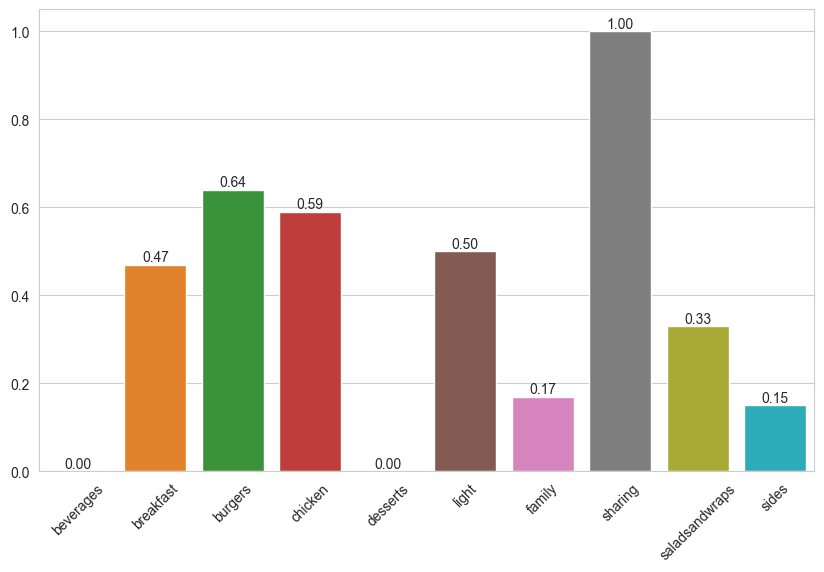

In [17]:
# run the 'daily' function through each category
cat_list = menu['category'].unique()
value_list = []

for i in cat_list:
    value_list.append(daily(i, 'sodium_mg', 2000, 0.4))

# show the results with a bar plot
sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))

ax = sns.barplot(x = cat_list, y = value_list)
ax.bar_label(ax.containers[0], fmt = '%.2f')
plt.xticks(rotation = 45)
plt.show()

The recommended daily allowance (RDA) for sodium is 2,000mg for an adult male
* Mcd does not provide the healthiest options in terms of sodium intake
* About 60% of items in `Burgers` and `Chicken` contributes more than 800mg of sodium (40% of RDA)
* This holds true even for the healthier options
    * 50% of meals from `Eat Light Under 500 Calories` contains 800mg of sodium (40% of RDA)
    * 50% of ala carte items from `Breakfast` contains 800mg of sodium (40% of RDA)
    * 33% of ala carte items from `Salads and Wraps` contains 800mg of sodium (40% of RDA)

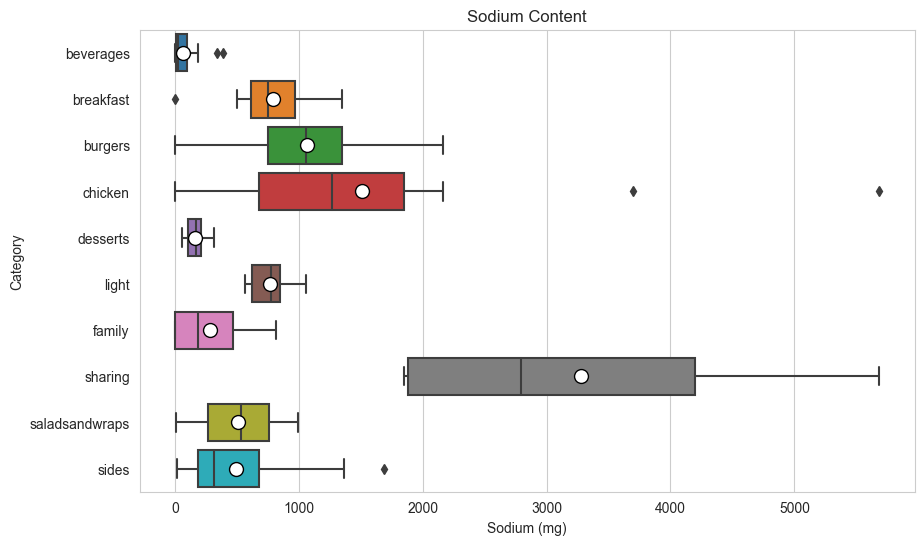

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize = (10, 6))

box = sns.boxplot(
    x = 'sodium_mg',
    y = 'category',
    data = menu,
    showmeans = True,
    meanprops = {'marker': 'o',
                 'markerfacecolor': 'white',
                 'markeredgecolor': 'black',
                 'markersize': '10'}
    ).set(
    title = 'Sodium Content',
    xlabel = 'Sodium (mg)',
    ylabel = 'Category'
)

* Ala carte items in `Breakfast`, `Burgers` and `Chicken` contains about 800mg - 1,200mg of sodium (40% - 60% of RDA)
* When ordered as a meal (eg `Burgers` and `Sides`), the sodium content goes up to 1,600mg - 2,000mg (80% - 100% of RDA)
* Even though meals from `Eat Light Under 500 Calories` have much lower sodium content at about 800mg (40% of RDA), it is still considered very high

## Conclusion
Mcd provides decent options that can supplement your protein intake. However, they should only be consumed infrequently as it contains very unhealthy levels of sodium, saturated fats and cholesterol
<br>
Subjectively, they can also serve as a way for you to load up on calories when needed. Eg during dirty bulking.

* Pros
    * High in calories (subjective)
    * High in protein
    * Decent fibre content

* Cons
    * Very high sodium content
    * Very high in saturated fats
    * High in cholesterol

## Disclaimer
Please note that the conclusion drawn is based on the limited nutritional information available and is in no way a complete representation of the nutritional facts as a whole.